<a href="https://colab.research.google.com/github/djglab/Foxk1_manuscript/blob/main/notebooks/RNAseq_Foxk1_D10_analysis_Control_and_Iwr1_KO_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this notebook is to see the commonly upregulated genes in Foxk1 KO IWR1 and Control samples 

In [ ]:
start_time0 <- Sys.time()

# Downloading and installing packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)
system('apt-get install libcairo2-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

In [ ]:
install.packages(c('gsl', 'devtools'))
install.packages('Cairo')
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'BiocParallel', 'SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'dplyr', 
  'DESeq2', 'VennDiagram', 'ggwordcloud', 'GenomicRanges', 'apeglm', 'biomaRt', 'org.Mm.eg.db', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'clusterProfiler', 'ggplot2',
  'GO.db','ReactomePA', 'ggnewscale', 'pathview', 'gage', 'gageData'
))
devtools::install_github("jokergoo/ComplexHeatmap")
devtools::install_github("GuangchuangYu/ChIPseeker")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("gsl", "devtools")):
“installation of package ‘gsl’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'dplyr' 'ggplot2'”
Installing package(s) 'BiocVersion', 'BiocParallel', 'SummarizedExperiment',
  'gplots', 'circlize', 'plyr', 'DESeq2', 'VennDiagram', 'ggwordcloud',
  'GenomicRanges', 'apeglm', 'biomaRt', 'org.Mm.eg.db',
  'TxDb.Mmusculus.UCSC.mm10.knownGene', 'clusterProfiler', 'GO.db

iterators  (NA -> 1.0.14) [CRAN]
foreach    (NA -> 1.5.2 ) [CRAN]
doParallel (NA -> 1.0.17) [CRAN]
clue       (NA -> 0.3-60) [CRAN]
GetoptLong (NA -> 1.0.5 ) [CRAN]


Installing 5 packages: iterators, foreach, doParallel, clue, GetoptLong

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpUc0oFz/remotes3d714ee7df/jokergoo-ComplexHeatmap-267a221/DESCRIPTION’ ... OK
* preparing ‘ComplexHeatmap’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘ComplexHeatmap_2.11.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




enrichplot   (1.14.2 -> d11b60bb6...) [GitHub]
withr        (2.4.3  -> 2.5.0       ) [CRAN]
openssl      (1.4.6  -> 2.0.0       ) [CRAN]
rlang        (1.0.1  -> 1.0.2       ) [CRAN]
Rcpp         (1.0.8  -> 1.0.8.3     ) [CRAN]
TxDb.Hsap... (NA     -> 3.2.2       ) [CRAN]
plotrix      (NA     -> 3.8-2       ) [CRAN]


Installing 6 packages: withr, openssl, rlang, Rcpp, TxDb.Hsapiens.UCSC.hg19.knownGene, plotrix

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





* checking for file ‘/tmp/RtmpUc0oFz/remotes3d39937a9e/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’ ... OK
* preparing ‘enrichplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘enrichplot_1.13.1.992.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpUc0oFz/remotes3d55f95015/YuLab-SMU-ChIPseeker-5371322/DESCRIPTION’ ... OK
* preparing ‘ChIPseeker’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ChIPseeker_1.31.3.900.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#Loading R packages

In [ ]:
library(BiocParallel)
library(SummarizedExperiment)
library(gplots)
library(circlize)
library(ComplexHeatmap)
register(MulticoreParam(4)) # Use 8 cores
library(plyr)
library(dplyr)
library(DESeq2)
library(VennDiagram)
library(ggwordcloud)
library(GenomicRanges)
library(apeglm)
library(biomaRt)
library(org.Mm.eg.db)
library(ChIPseeker)
library(clusterProfiler)
library(ggplot2)
library(tidyr)
library(Matrix)
library(GO.db)
library(matrixStats)
library(ComplexHeatmap)
library(stringr)
library(DOSE)
library(ReactomePA)
library(ggnewscale)
library(GOSemSim)
library(enrichplot)
library(pathview)
library(gage)
library(gageData)

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, ro

# Download data processed on MSI

Processed data using tximport to extract transcript-level abundance, estimated counts and transcript lengths. Summarized the abundance.tsv file from Kallisto.

In [ ]:
txi_file <- 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/Kallisto_D10_Foxk1_EBs_txi_v1.rds'
txi <- txi_file %>%
  url() %>%
  gzcon() %>%
  readRDS()

Transcripts to gene txt from Kallisto for mm10

In [ ]:
t2g_dat <- read.table('https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/transcripts_to_genes.txt', sep = '\t')

In [ ]:
colnames(t2g_dat) <- c('ensembl_transcript', 'ensembl_gene', 'gene_name')
head(t2g_dat)

,ensembl_transcript,ensembl_gene,gene_name
,<chr>,<chr>,<chr>
1,ENSMUST00000193812.1,ENSMUSG00000102693.1,4933401J01Rik
2,ENSMUST00000082908.1,ENSMUSG00000064842.1,Gm26206
3,ENSMUST00000162897.1,ENSMUSG00000051951.5,Xkr4
4,ENSMUST00000159265.1,ENSMUSG00000051951.5,Xkr4
5,ENSMUST00000070533.4,ENSMUSG00000051951.5,Xkr4
6,ENSMUST00000192857.1,ENSMUSG00000102851.1,Gm18956


Text parsing to get the condition in the format e.g. 'KO' for DESeq2

In [ ]:
condition <- gsub('1[0-9]+_|2_|D10_|Foxk1|_EBs|_[0-9]+|', '', colnames(txi$counts)) ##parsing text to get the day and condition to get 'D3_KO' 

In [ ]:
sampleTable <- as.data.frame(condition)

In [ ]:
rownames(sampleTable) <- colnames(txi$counts)

In [ ]:
head(sampleTable)

,condition
,<chr>
13_D10_Control_EBs_1,Control
14_D10_Control_EBs_2,Control
15_D10_Foxk1KO_EBs_1,KO
16_D10_Foxk1KO_EBs_2,KO
17_D10_Foxk1KO_IWR1_EBs_1,KO_IWR1
18_D10_Foxk1KO_IWR1_EBs_2,KO_IWR1


# Normalize the read counts by DESeq2

In [ ]:
dds <- DESeqDataSetFromTximport(txi, sampleTable, ~condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using counts and average transcript lengths from tximport



In [ ]:
dds_res <- DESeq(dds)

estimating size factors

using 'avgTxLength' from assays(dds), correcting for library size

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



## PC calculations from DESeq2 library (Variance Stabilizing Transformation)

In [ ]:
set.seed(2345)
vsd <- vst(dds_res, blind=FALSE)
head(assay(vsd), 3)

,13_D10_Control_EBs_1,14_D10_Control_EBs_2,15_D10_Foxk1KO_EBs_1,16_D10_Foxk1KO_EBs_2,17_D10_Foxk1KO_IWR1_EBs_1,18_D10_Foxk1KO_IWR1_EBs_2
ENSMUSG00000000001.4,13.22223,13.20128,13.43130,13.60275,13.77626,13.37814
ENSMUSG00000000003.15,5.94861,5.94861,5.94861,5.94861,5.94861,5.94861
ENSMUSG00000000028.15,10.27774,10.42099,10.23619,10.20597,11.31713,10.98636


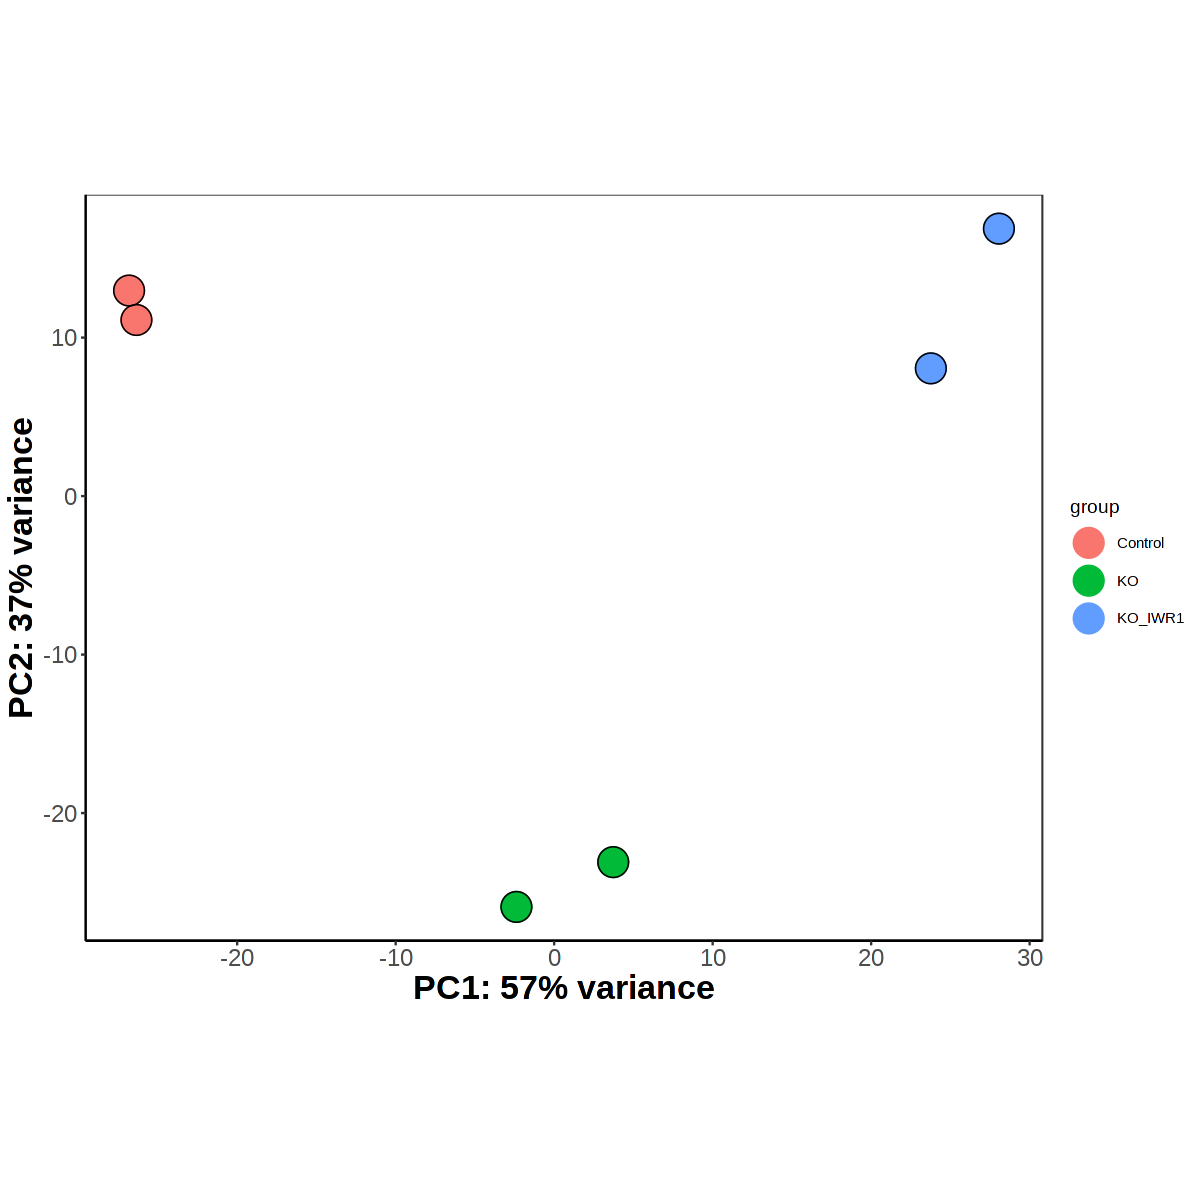

In [ ]:
options(repr.plot.width=10, repr.plot.height = 10)
plotPCA(vsd, intgroup=c("condition"))+ geom_point(size=8) + geom_point(shape = 1,size = 8,colour = "black") +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), axis.text=element_text(size=14),
        axis.title=element_text(size=20,face="bold"))

# Mapping Ensembl transcripts to gene symbols using Transcript_to_genes from kallisto

In [ ]:
ensembl_id <- as.data.frame(rownames(test_sub))
colnames(ensembl_id) <- c('ensembl_gene_id') ##dataframe to comply with t2g ensembl transcript id

In [ ]:
ensembl_id$gene_name <- t2g_dat$gene_name[match(ensembl_id$ensembl_gene_id, t2g_dat$ensembl_gene)] ##Appending a column to ensembl dataframe when the ensembl transcript id of the subsetted countdata to the data from biomart

# WT vs KO  DESeq2
**981** genes are upregulated in WT day 10 and **581** genes are upregulated in KO Day 10

In [ ]:
Control <- results(dds_res, contrast = c('condition', 'Control', 'KO'), alpha = 0.05) 

The below step is to get the data for log2 fold change equal to or greater than 1 with a significant p-adj value for WT vs KO. 

In [ ]:
sig <- Control[!is.na(Control$padj) & Control$padj<0.05 & abs(Control$log2FoldChange)>=1,] ##Subsetting significant values with absolute fold change above 1

In [ ]:
head(sig)
summary(sig)

log2 fold change (MLE): condition Control vs KO 
Wald test p-value: condition Control vs KO 
DataFrame with 6 rows and 6 columns
                        baseMean log2FoldChange     lfcSE      stat      pvalue
                       <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000000094.12   418.9298       -2.24982  0.435953  -5.16070 2.46026e-07
ENSMUSG00000000126.11   430.1009       -1.45765  0.412585  -3.53296 4.10930e-04
ENSMUSG00000000182.9     17.4358        3.83983  1.221304   3.14404 1.66631e-03
ENSMUSG00000000184.12 13944.9085        1.19638  0.253409   4.72117 2.34494e-06
ENSMUSG00000000202.9    113.1470        2.88042  0.730681   3.94210 8.07726e-05
ENSMUSG00000000244.17   206.2979       -1.29690  0.419910  -3.08851 2.01163e-03
                             padj
                        <numeric>
ENSMUSG00000000094.12 1.03284e-05
ENSMUSG00000000126.11 6.56739e-03
ENSMUSG00000000182.9  2.09459e-02
ENSMUSG00000000184.12 7.52269e-05
ENSMUSG00000000202.9  1.665


out of 1562 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 981, 63%
LFC < 0 (down)     : 581, 37%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
sig$gene_name <- t2g_dat$gene_name[match(rownames(sig), t2g_dat$ensembl_gene)] ## Adding a column with gene names in this dataset of significant genes

# IWR1 KO vs KO
**1123** genes are upregulated in IWR1 KO and **1687** genes are upregulated in KO

In [ ]:
KO <- results(dds_res, contrast = c('condition', 'KO_IWR1', 'KO'), alpha = 0.05)

The below step is to get the data for log2 fold change equal to or greater than 1 with a significant p-adj value for IWR1 KO vs KO. 

In [ ]:
sig_ko <- KO[!is.na(KO$padj) & KO$padj<0.05 & abs(KO$log2FoldChange)>=1,] ##Subsetting significant values with absolute fold change above 1

In [ ]:
head(sig_ko)
summary(sig_ko)

log2 fold change (MLE): condition KO_IWR1 vs KO 
Wald test p-value: condition KO_IWR1 vs KO 
DataFrame with 6 rows and 6 columns
                       baseMean log2FoldChange     lfcSE      stat      pvalue
                      <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000000028.15  1475.730        1.01477  0.265387   3.82374 1.31444e-04
ENSMUSG00000000085.16  1669.205       -1.35473  0.322478  -4.20098 2.65759e-05
ENSMUSG00000000094.12   418.930       -2.03395  0.434623  -4.67980 2.87150e-06
ENSMUSG00000000125.5    105.166        3.00294  0.515428   5.82611 5.67354e-09
ENSMUSG00000000126.11   430.101       -1.37927  0.412096  -3.34697 8.16987e-04
ENSMUSG00000000142.15   822.973        1.11598  0.377465   2.95650 3.11147e-03
                             padj
                        <numeric>
ENSMUSG00000000028.15 1.44207e-03
ENSMUSG00000000085.16 3.80791e-04
ENSMUSG00000000094.12 5.70217e-05
ENSMUSG00000000125.5  2.46858e-07
ENSMUSG00000000126.11 6.46318e-03
E


out of 2810 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 1123, 40%
LFC < 0 (down)     : 1687, 60%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
sig_ko$gene_name <- t2g_dat$gene_name[match(rownames(sig_ko), t2g_dat$ensembl_gene)] ## Adding a column with gene names in this dataset of significant genes

# Commonly upregulated genes between Control and IWR1 Foxk1 KO when compared to Foxk1 KO

In [ ]:
up_wt <- sig[sig$log2FoldChange > 0,]$gene_name

In [ ]:
iwr1_up <- sig_ko[sig_ko$log2FoldChange > 0,]$gene_name

## Venn Diagram showing common genes upregulated in both Control and Iwr1 Foxk1 KO

(polygon[GRID.polygon.894], polygon[GRID.polygon.895], polygon[GRID.polygon.896], polygon[GRID.polygon.897], text[GRID.text.898], text[GRID.text.899], text[GRID.text.900], text[GRID.text.901], text[GRID.text.902]) 

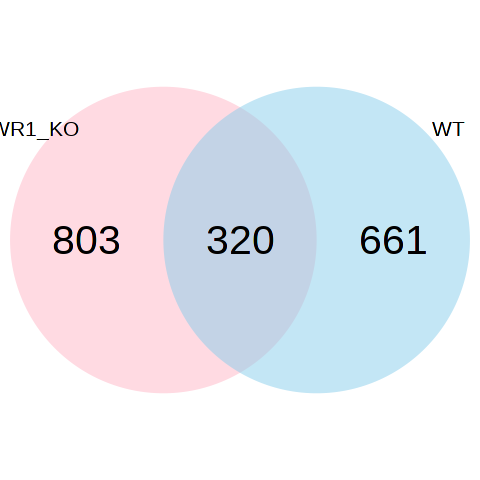

In [ ]:
options(repr.plot.width=4, repr.plot.height=4)
draw.pairwise.venn(
  area1 = length(up_wt),
  area2 = length(iwr1_up),
  cross.area = length(intersect(iwr1_up,up_wt)),
  category = c("WT", 'IWR1_KO'), 
  lty = "blank", 
  fill = c("skyblue", "pink1"),
  cex = 2,
  cat.cex = 1,
  scale = FALSE
)



In [ ]:
common_genes <- intersect(iwr1_up,up_wt)

In [ ]:
go <- enrichGO(gene = common_genes,
                OrgDb         = org.Mm.eg.db,
                keyType = 'SYMBOL',
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
        readable      = FALSE)

In [ ]:
enrich_go <- go %>% filter(str_detect(Description, 'pathway|cascade|development|regeneration')) %>% filter(!str_detect(Description, 'Wnt|Notch|negative|positive')) ##subsetting data to keep terms that include pathway, cascade, development, regeneration and cardiac and excludes negative and positive

## Top 20 genes upregulated in the pathways 
muscle tissue development & striated muscle tissue development

In [ ]:
go_muscle <- enrich_go[enrich_go$Description %in% c('muscle tissue development','striated muscle tissue development')]

In [ ]:
go_genes <- unlist(strsplit(go_muscle$geneID, split = '/'))

In [ ]:
top_enrich <- data.frame(sig[sig$gene_name %in% go_genes,]) %>% arrange(-log2FoldChange)

In [ ]:
scale_mat <- scale(t(counts(dds_res))) #Scaling the matrix

In [ ]:
scale_mat[is.na(scale_mat) == 'TRUE']

numeric(0)

In [ ]:
mat <- t(scale_mat)

In [ ]:
rownames(mat) <- t2g_dat$gene_name[match(rownames(mat), t2g_dat$ensembl_gene)]

In [ ]:
mat_top <- mat[rownames(mat) %in% head(top_enrich$gene_name, 20),colnames(mat) %in% c('13_D10_Control_EBs_1',	'14_D10_Control_EBs_2',	'15_D10_Foxk1KO_EBs_1',	'16_D10_Foxk1KO_EBs_2')]

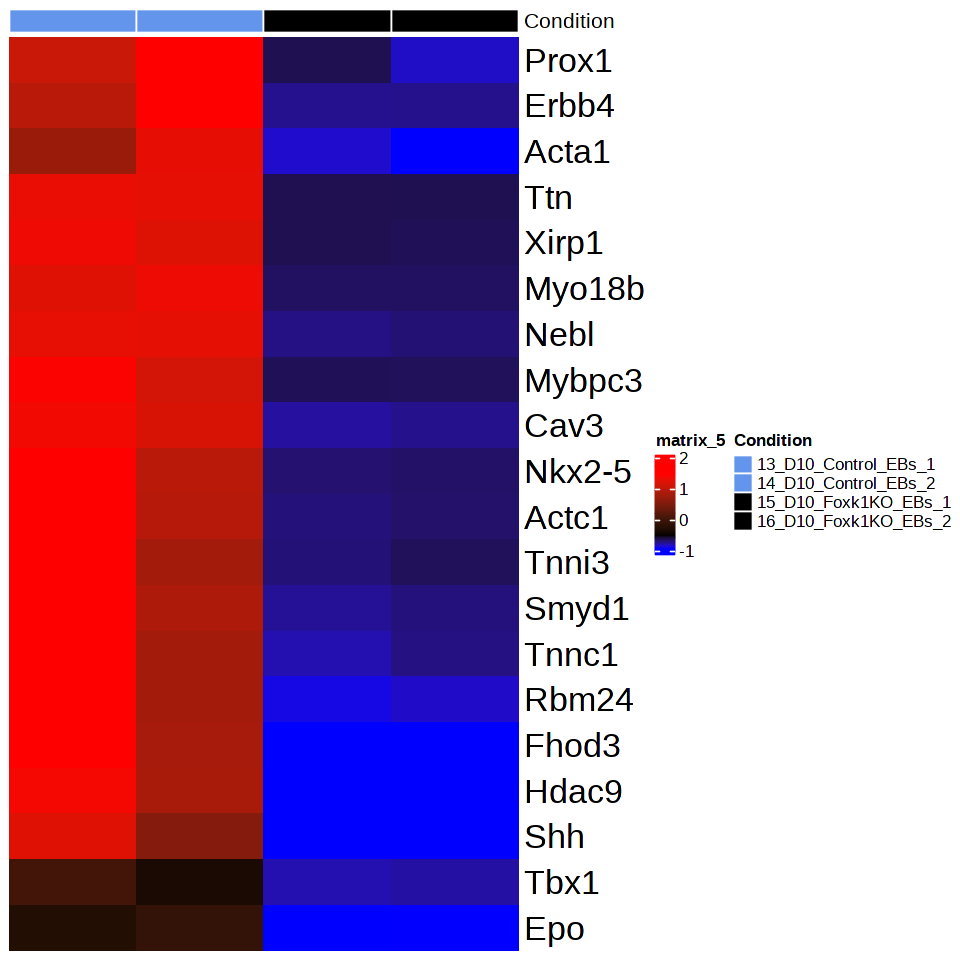

In [ ]:
column_annotation <- HeatmapAnnotation(
  Condition = colnames(mat_top),
  col = list(Condition = c("13_D10_Control_EBs_1" = "cornflowerblue", "14_D10_Control_EBs_2" = "cornflowerblue", "15_D10_Foxk1KO_EBs_1" = "black", "16_D10_Foxk1KO_EBs_2" = "black")),
  gp = gpar(col = "white")
)

col_fun <- colorRamp2(quantile(mat_top, c(0.1, 0.5, 0.9)), c("blue", "black", "red"))

options(repr.plot.width=8, repr.plot.height = 8)
Heatmap(
  mat_top,
  cluster_rows = TRUE,
  cluster_columns = TRUE,
  top_annotation = column_annotation,
  show_row_names = TRUE,
  show_column_names = FALSE,
  show_column_dend = FALSE,
  col = col_fun,
  show_row_dend = FALSE,
  row_names_gp = gpar(fontsize = 20))

## Significant pathways upregulated using genes common between Control and Foxk1 KO

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



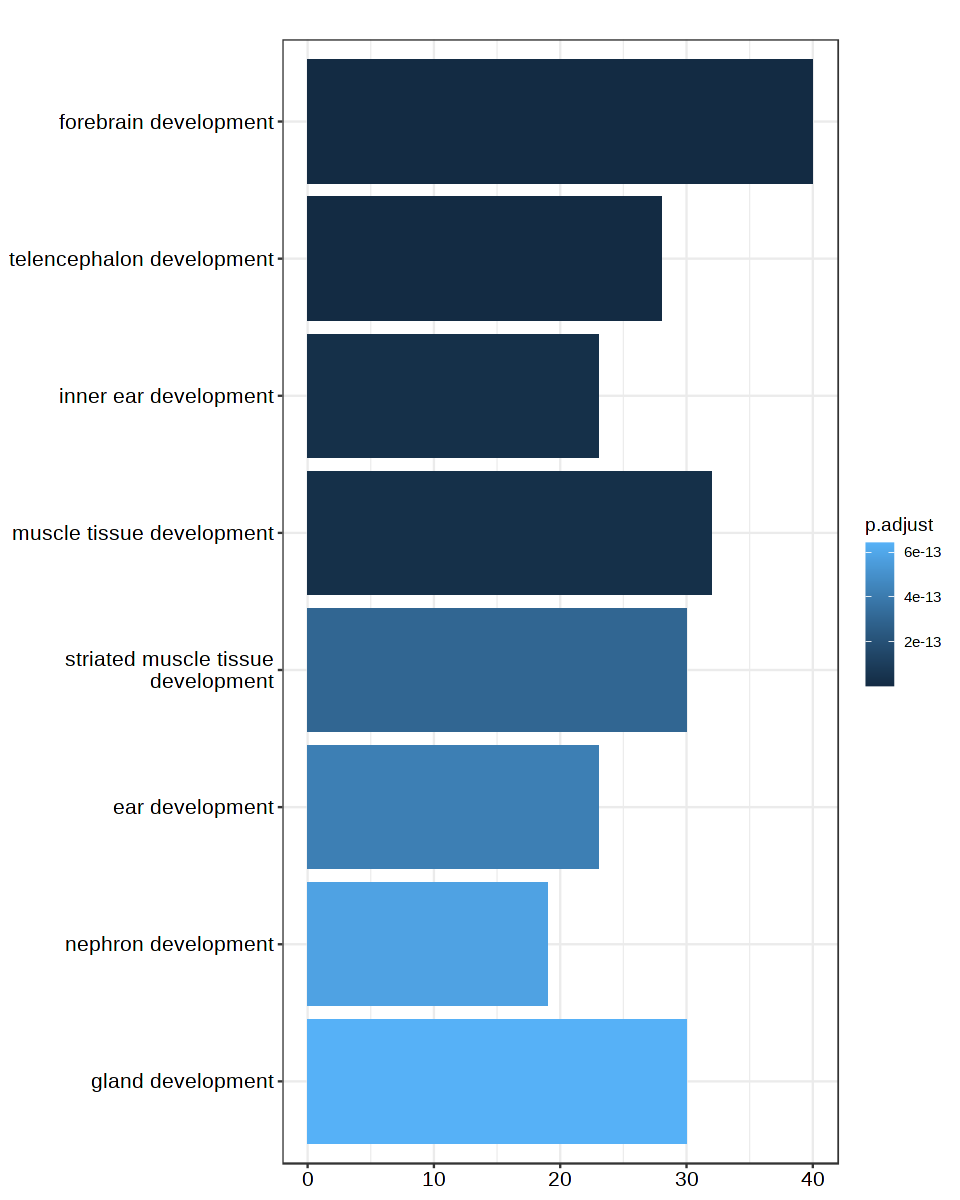

In [ ]:
options(repr.plot.width=8, repr.plot.height=10)
barplot(enrich_go, showCategory=8)  + scale_fill_gradient(low = "#132B43", high = "#56B1F7")

In [ ]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] gageData_2.32.0             gage_2.44.0                
 [3] pathview_1.34.0             enrichplot_1.13.1.992      
 [5] GOSemSim_2.20.0             ggnewscale_0.4.6           
 [7] ReactomePA_1.38.0           DOSE_3.20.1                
 [